In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris(as_frame=True)

In [4]:
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
df = iris.data.head(20)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
df['petal width (cm)'].value_counts()

,count
petal width (cm),
0.2,10
0.3,4
0.4,3
0.1,3


In [16]:
df.groupby('petal width (cm)').count()

,sepal length (cm),sepal width (cm),petal length (cm)
petal width (cm),,,
0.1,3,3,3
0.2,10,10,10
0.3,4,4,4
0.4,3,3,3


In [17]:
df.groupby('petal width (cm)')

In [26]:
for i in df.groupby('petal width (cm)'):
    print(type(i[1]))
    print(i)
    print('===')

<class 'pandas.core.frame.DataFrame'>
(0.1,     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
9                 4.9               3.1                1.5               0.1
12                4.8               3.0                1.4               0.1
13                4.3               3.0                1.1               0.1)
===
<class 'pandas.core.frame.DataFrame'>
(0.2,     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = iris.data[['petal length (cm)']].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8964)

In [ ]:
log_reg = LogisticRegression(random_state=8964)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=8964)

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

In [ ]:
y_proba

array([[9.99999911e-01, 8.89376735e-08],
       [9.99999910e-01, 8.98314673e-08],
       [9.99999909e-01, 9.07342434e-08],
       ...,
       [9.98103458e-01, 1.89654185e-03],
       [9.98084435e-01, 1.91556495e-03],
       [9.98065222e-01, 1.93477849e-03]])

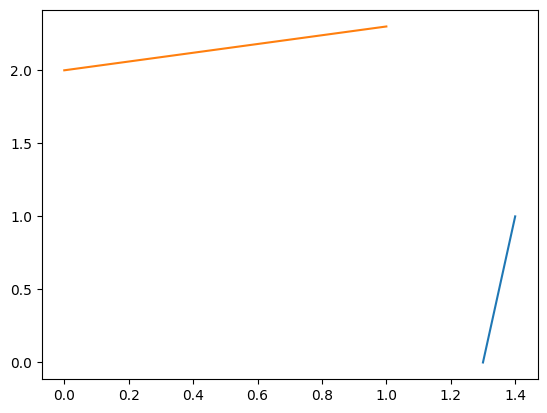

In [ ]:
plt.plot([1.3, 1.4], [0, 1], [2, 2.3])

# K-mean

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k,
                # random_state=42
                )
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([1, 1, 0, ..., 3, 0, 1], dtype=int32)

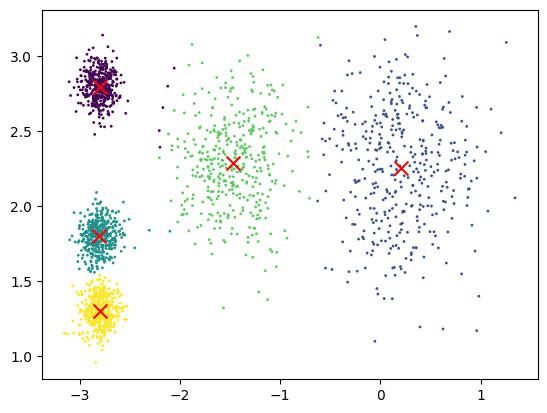

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k,
                n_init=10,
                # random_state=42
                )
y_pred = kmeans.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], s=1, c=y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red')

In [ ]:
kmeans.n_init

'auto'

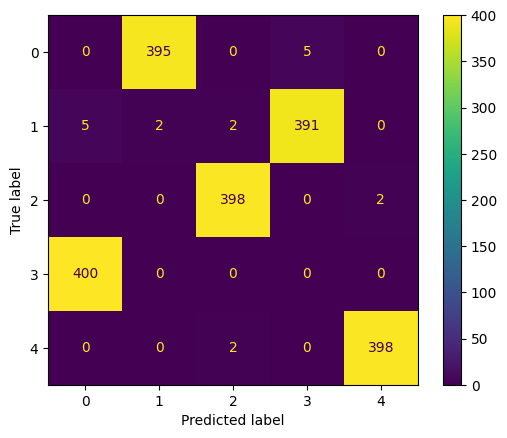

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, y_pred)